In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
batch_size = 128
img_height = 224
img_width = 224

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'worosa'
os.environ['KAGGLE_KEY'] = 'feed01f37299bea03c690bc5e3621bfb'

!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset
!unzip -u -qq microsoft-catsvsdogs-dataset

#corrupted or useless files
!rm 'MSR-LA - 3467.docx'
!rm 'readme[1].txt'
#!rm 'PetImages/Cat/7968.jpg'
!rm 'PetImages/Cat/666.jpg'
#!rm 'PetImages/Dog/7112.jpg'
!rm 'PetImages/Dog/11702.jpg'
#!rm 'PetImages/Cat/untitled'
!rm 'PetImages/Dog/Thumbs.db'
!rm 'PetImages/Cat/Thumbs.db'

 99% 777M/788M [00:05<00:00, 122MB/s] 
100% 788M/788M [00:05<00:00, 141MB/s]


In [ ]:
from PIL import Image

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item).convert('RGB')
            f, e = os.path.splitext(path+item)
            imResize = im.resize((img_height, img_width), Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=100)
            print(path+item)

path = "PetImages/Cat/"
dirs = os.listdir( path )

resize()

path = "PetImages/Dog/"
dirs = os.listdir( path )

resize()

Output streaming troncato alle ultime 5000 righe.
PetImages/Dog/2364.jpg
PetImages/Dog/6575.jpg
PetImages/Dog/11441.jpg
PetImages/Dog/9877.jpg
PetImages/Dog/9598.jpg
PetImages/Dog/3591.jpg
PetImages/Dog/8695.jpg
PetImages/Dog/1775.jpg
PetImages/Dog/3096.jpg
PetImages/Dog/8274.jpg
PetImages/Dog/1085.jpg
PetImages/Dog/7296.jpg
PetImages/Dog/7425.jpg
PetImages/Dog/11295.jpg
PetImages/Dog/10233.jpg
PetImages/Dog/10416.jpg
PetImages/Dog/789.jpg
PetImages/Dog/11050.jpg
PetImages/Dog/9621.jpg
PetImages/Dog/6400.jpg
PetImages/Dog/3497.jpg
PetImages/Dog/4085.jpg
PetImages/Dog/10176.jpg
PetImages/Dog/368.jpg
PetImages/Dog/11407.jpg
PetImages/Dog/3956.jpg
PetImages/Dog/7145.jpg
PetImages/Dog/2168.jpg
PetImages/Dog/25.jpg
PetImages/Dog/2673.jpg
PetImages/Dog/6012.jpg
PetImages/Dog/932.jpg
PetImages/Dog/8353.jpg
PetImages/Dog/9011.jpg
PetImages/Dog/7714.jpg
PetImages/Dog/2355.jpg
PetImages/Dog/562.jpg
PetImages/Dog/5823.jpg
PetImages/Dog/11999.jpg
PetImages/Dog/11422.jpg
PetImages/Dog/10417.jpg
Pet

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

PetImages/Dog/10968.jpg
PetImages/Dog/3075.jpg
PetImages/Dog/2480.jpg
PetImages/Dog/5437.jpg
PetImages/Dog/3712.jpg
PetImages/Dog/10284.jpg
PetImages/Dog/12198.jpg
PetImages/Dog/8064.jpg
PetImages/Dog/11474.jpg
PetImages/Dog/6648.jpg
PetImages/Dog/10846.jpg
PetImages/Dog/1351.jpg
PetImages/Dog/9600.jpg
PetImages/Dog/6306.jpg
PetImages/Dog/10658.jpg
PetImages/Dog/8839.jpg
PetImages/Dog/7917.jpg
PetImages/Dog/11253.jpg
PetImages/Dog/1101.jpg
PetImages/Dog/11164.jpg
PetImages/Dog/6843.jpg
PetImages/Dog/6604.jpg
PetImages/Dog/3249.jpg
PetImages/Dog/5212.jpg
PetImages/Dog/10403.jpg
PetImages/Dog/2157.jpg
PetImages/Dog/9644.jpg
PetImages/Dog/6564.jpg
PetImages/Dog/7310.jpg
PetImages/Dog/2828.jpg
PetImages/Dog/4059.jpg
PetImages/Dog/359.jpg
PetImages/Dog/950.jpg
PetImages/Dog/1410.jpg
PetImages/Dog/10247.jpg
PetImages/Dog/4346.jpg
PetImages/Dog/732.jpg
PetImages/Dog/5452.jpg
PetImages/Dog/1096.jpg
PetImages/Dog/2454.jpg
PetImages/Dog/866.jpg
PetImages/Dog/4893.jpg
PetImages/Dog/5042.jpg
PetIm

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_augmentation = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    #brightness_range = (0,50),
                    shear_range = 0.2,
                    horizontal_flip=True,
                    #vertical_flip=True,
                    validation_split=0.2
)

In [ ]:
train_generator = train_augmentation.flow_from_directory(
  "PetImages/",
  class_mode='binary',
  subset = "training",
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [ ]:
validation_augmentation = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
validation_generator = validation_augmentation.flow_from_directory(
  "PetImages/",
  class_mode='binary',
  subset="validation",
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 4998 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(img_height,img_width,3)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#model.add(Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))

In [ ]:
from keras.optimizers import SGD
from keras.optimizers import RMSprop

#opt = SGD(learning_rate=0.001, momentum=0.9)
#opt = RMSprop(learning_rate=0.001, momentum=0.9)

model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
history = model.fit(train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20, 
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = len(validation_generator)
)

_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=0)
print('accuracy > %.3f%%' % (acc * 100.0))

Epoch 1/20
157/157 [==============================] - 319s 2s/step - loss: 1.5524 - accuracy: 0.5802 - val_loss: 0.5971 - val_accuracy: 0.6809
Epoch 2/20
157/157 [==============================] - 286s 2s/step - loss: 0.6059 - accuracy: 0.6694 - val_loss: 0.5544 - val_accuracy: 0.7115
Epoch 3/20
157/157 [==============================] - 287s 2s/step - loss: 0.5758 - accuracy: 0.6956 - val_loss: 0.5197 - val_accuracy: 0.7457
Epoch 4/20
157/157 [==============================] - 287s 2s/step - loss: 0.5541 - accuracy: 0.7136 - val_loss: 0.5187 - val_accuracy: 0.7447
Epoch 5/20
157/157 [==============================] - 287s 2s/step - loss: 0.5301 - accuracy: 0.7334 - val_loss: 0.4804 - val_accuracy: 0.7721
Epoch 6/20
157/157 [==============================] - 287s 2s/step - loss: 0.5144 - accuracy: 0.7431 - val_loss: 0.4743 - val_accuracy: 0.7789
Epoch 7/20
157/157 [==============================] - 286s 2s/step - loss: 0.4948 - accuracy: 0.7577 - val_loss: 0.4700 - val_accuracy: 0.7835

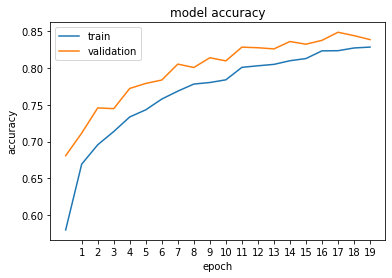

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xticks(range(1,20))
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

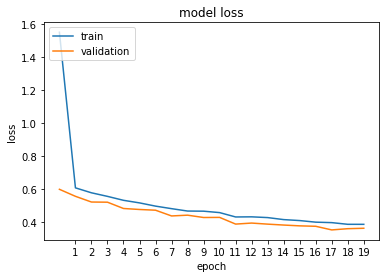

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(range(1,20))
plt.legend(['train'], loc='upper left')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [ ]:
!unzip -u -qq test_set

path = "test_set/Cat/"
dirs = os.listdir( path )

resize()

path = "test_set/Dog/"
dirs = os.listdir( path )

resize()

In [ ]:
#rmdir "test_set/.ipynb_checkpoints"

In [ ]:
test_generator = ImageDataGenerator().flow_from_directory(
  "test_set/",
  class_mode='binary',
  target_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle = False)

In [ ]:
#Generate predictions with the model
predictions = model.predict(test_generator, batch_size=batch_size, verbose=1)

In [ ]:
a = 0
b = 0
y_pred = []

for i in predictions:
  if (i >= 0.5):
    y_pred.append(1)
    a = a + 1
  if (i < 0.5):
    y_pred.append(0)
    b = b + 1
print(a)
print(b)

In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(test_generator.classes, y_pred)
#print(cf_matrix)
import seaborn as sns
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labelsP = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labelsP = np.asarray(labelsP).reshape(2,2)
sns.heatmap(cf_matrix, annot=labelsP, fmt='', cmap='Blues')

In [ ]:
precision = cf_matrix.flatten()[3] / (cf_matrix.flatten()[3] + cf_matrix.flatten()[1])
recall = cf_matrix.flatten()[3] / (cf_matrix.flatten()[3] + cf_matrix.flatten()[2])
print('accuracy > %.2f' % precision)
print('recall > %.2f' % recall)